Nome: Raylander Marques Melo      
Matrícula: 494563

In [53]:
import numpy as np
import pandas as pd
from plotnine import *
import matplotlib as plt
import statistics 
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score,KFold
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn import utils
from sklearn.preprocessing import PolynomialFeatures

from scipy import stats

import plotly.graph_objects as go
import plotly.express as px 

## Carregue o dataset

In [4]:
df1 = pd.read_csv("ex1data1.txt",delimiter=',',names=['v1','v2'])
df1

,v1,v2
0,6.1101,17.59200
1,5.5277,9.13020
2,8.5186,13.66200
3,7.0032,11.85400
4,5.8598,6.82330
...,...,...
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510


In [5]:
df2a = np.genfromtxt('ex1data2.txt', delimiter= ' ')
df2 = pd.DataFrame(data=df2a, columns=['v1','v2','v3'])
df2

,v1,v2,v3
0,2.104,3.0,3.99900
1,1.600,3.0,3.29900
2,2.400,3.0,3.69000
3,1.416,2.0,2.32000
4,3.000,4.0,5.39900
5,1.985,4.0,2.99900
6,1.534,3.0,3.14900
7,1.427,3.0,1.98999
8,1.380,3.0,2.12000
9,1.494,3.0,2.42500


### Identifique as variáveis independentes e dependentes e associe-as às suas respectivas variáveis

In [6]:
Xdf1 = df1['v1'].values
Ydf1 = df1['v2'].values

In [7]:
Xdf2 = df2.loc[:,'v1':'v2'].values
Ydf2 = df2['v3'].values

# --------------Regressão Linear Univariada--------------

### Escolha uma coluna do dataset para variável independente - aquela que você considera fazer sentido para predizer o preço de uma casa - e gere um modelo de regressão linear univariada.  
#### Para esta tarefa, não é necessário normalizar os dados, nem gerar divisão treino e teste. 
### Use o conjunto de dados ex1data1.txt
### Para este algoritmo utilize α = 0.001 e utilize 1000 épocas de treinamento. Para cada época de treinamento, calcule o erro quadrático médio (EQM)

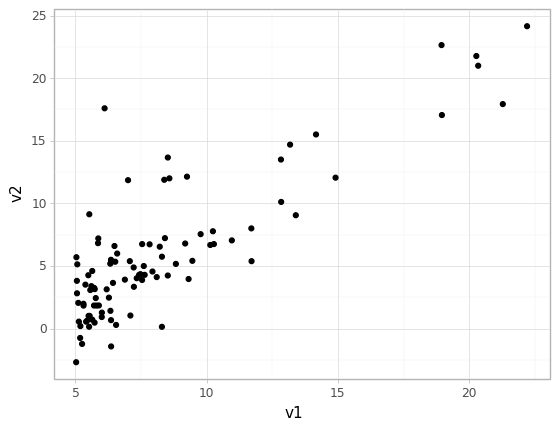

<ggplot: (8775828315668)>

In [8]:
(ggplot(df1,aes('v1','v2'))
 + geom_point()
 + theme_light()
)

In [9]:
df1_shuffle = df1.copy()
w0 = 0 # termo independente
w1 = 50 # coeficiente angular
alfa = 0.001 # Taxa de aprendizado
EQM = list() # Erro Quadrado Médio por época
for epoca in range(1000):
    acc = 0 
    erro = 0
    erro2 = 0
    for i in range(len(df1_shuffle)):
        x_i = df1_shuffle.iloc[i,0]
        y_i = df1_shuffle.iloc[i,1]
        erro += (y_i - w1*x_i - w0)
        erro2 += (y_i - w1*x_i - w0)*df1_shuffle.iloc[i,0]
        acc = acc + erro*erro
        
    w0 = w0 + (alfa*erro)/len(df1_shuffle)
    w1 = w1 + (alfa*erro2)/len(df1_shuffle)
        
    EQM.append(acc/len(df1_shuffle))

In [10]:
print("Os pesos encontrados foram", w0, "e", w1)

Os pesos encontrados foram -4.728601800936733 e 1.2766995393246423


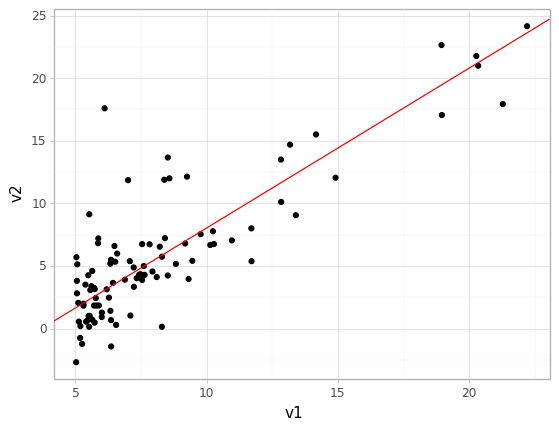

<ggplot: (8775828204719)>

In [11]:
(ggplot(df1,aes('v1','v2'))
 + geom_point()
 + theme_light()
 + geom_abline(intercept=w0 , slope=w1, color='red')
)

In [12]:
def predict_(w0,w1,x):
    y = w1*x + w0
    return y

predict_(w0,w1,1.25)

-3.13272737678093

In [13]:
# Convertendo lista em DataFrame para plotar no PlotNine
EQM_df = pd.DataFrame(EQM)
EQM_df

,0
0,5.286336e+08
1,4.451332e+08
2,3.748115e+08
3,3.155892e+08
4,2.657154e+08
...,...
995,3.086862e+03
996,3.086743e+03
997,3.086623e+03
998,3.086503e+03


### Plote o gráfico com a saída do modelo.
#### Para esta questão, basta visualizar o comportamento da reta gerada no modelo (sem utilizar métricas de avaliação como EQM ou R2)

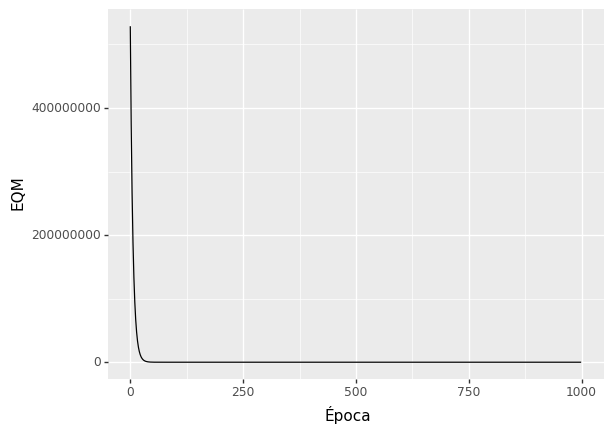

<ggplot: (8775826015770)>

In [14]:
 (ggplot(EQM_df, aes(EQM_df.index, EQM_df[0]))
+ geom_line()
+ xlab('Época')
+ ylab('EQM')
)

# --------------Normalização, Treino e teste--------------

### OBS: A partir de agora, todos os dados de entrada deverão ser normalizados e todos os modelos gerados deverão ser divididos em conjunto de treino e teste, e validados utilizando as métricas EQM e R2

## Refaça a questão anterior (gerar um modelo univariado) normalizando os dados, separando os dados em treino e teste, sem plotar gráfico, apenas plotando as saídas das métricas (EQM e R2) do conjunto de teste.
#### Para essa questão, ainda não será necessário utilizar Grid Search e/ou k-fold (validação cruzada)

In [15]:
scaler = MinMaxScaler()
scaler.fit(df1)
dfn=scaler.transform(df1)
dfn=pd.DataFrame(data=dfn,columns=['v1','v2'])

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(dfn[['v1']],dfn[['v2']], test_size=0.33, random_state=42)

In [17]:
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)
y_pred = regr.predict(X_test)

In [18]:
print('EQM: %.2f' %mean_squared_error(y_pred, Y_test))
print('R2: %.2f' %r2_score(Y_test, y_pred))

EQM: 0.02
R2: 0.62


## Gere um modelo de regressão linear multivariado (utilizando agora todas as colunas numéricas das variáveis independentes)
### Normalizar os dados, dividir em treino e teste, usar métricas de validação. Não precisa k-fold/ grid search.
### use o dataset ex1data2.txt
### dica Para este algoritmo utilize α = 0.01 e utilize 100 épocas de treinamento. Para cada época de treinamento, calcule o erro quadrático médio (EQM)

In [19]:
dfn2=stats.zscore(df2)
dfn2=pd.DataFrame(data=dfn2,columns=['v1','v2'])
dfn2

,v1,v2
0,0.131415,-0.226093
1,-0.509641,-0.226093
2,0.507909,-0.226093
3,-0.743677,-1.554392
4,1.271071,1.102205
5,-0.019945,1.102205
6,-0.593589,-0.226093
7,-0.729686,-0.226093
8,-0.789467,-0.226093
9,-0.644466,-0.226093


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(dfn2[['v1']],dfn2[['v2']], test_size=0.33, random_state=0)

In [21]:
regr = linear_model.LinearRegression(n_jobs=100)
regr.fit(X_train, Y_train,sample_weight =0.01)
y_pred = regr.predict(X_test)

In [22]:
print('Coefficient(s): ', regr.coef_)
print('Intercept(s): ', regr.intercept_)
print('EQM: %.2f' %mean_squared_error(y_pred, Y_test))
print('R2: %.2f' %r2_score(Y_test, y_pred))

Coefficient(s):  [[0.5336985]]
Intercept(s):  [0.04377099]
EQM: 0.90
R2: 0.21


In [23]:
fig = px.scatter_3d(df2, x = 'v1', y = 'v2', z = 'v3')
fig.update_traces(marker=dict(size=5))
fig.show()

In [24]:
alfa= 0.01;
epoca=100;
data = df2a
w0 = 1
w1 = 3
w2 = 1
EQM= list()
for i in range(epoca):
  np.random.shuffle(data)
  sum_EQM = 0
  for j in range(len(data)):
    x = data[j][0:2]
    y = data[j][2]
    y_esp = (w0 + w1 * x[0] + w2 * x[1])
    erro = y - y_esp
    sum_EQM += erro*erro
  w0 += alfa * erro
  w1 += alfa * erro * x[0]
  w2 += alfa * erro * x[1]
  EQM.append(sum_EQM/len(data))

In [25]:
"""
Printando pesos encontrados
"""
print("Os pesos encontrados foram", w0, "e", w1, "e", w2)

Os pesos encontrados foram 0.6516048542713652 e 2.053352810853707 e -0.3107863148502161


In [26]:
"""
Convertendo os dados do erro quadrático médio e exibindo.
"""
EQM_df = pd.DataFrame(data=EQM, columns=[0])
EQM_df

,0
0,49.643360
1,28.270934
2,23.823285
3,17.647228
4,12.014741
...,...
95,0.933879
96,0.844683
97,0.952061
98,0.851641


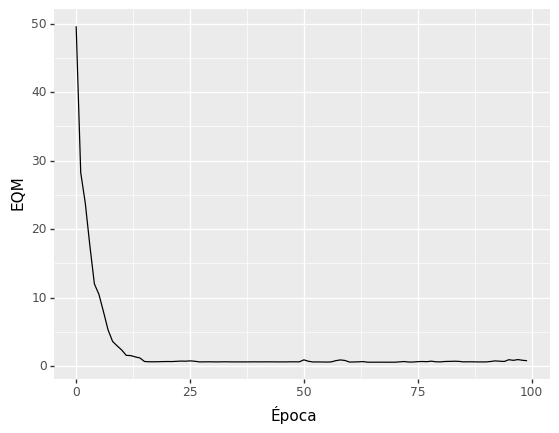

<ggplot: (8775825927024)>

In [27]:
"""
Plotando o erro quadrático médio em um gráfico com o auxílio do plotnine 
"""
(ggplot(EQM_df, aes(EQM_df.index, EQM_df[0]))
+ geom_line()
+ xlab('Época')
+ ylab('EQM')
)

# --------------Grid Search--------------

### Utilizando a técnica de grid search, encontre o melhor hiperparâmetro gerando um modelo de regressão linear multivariada regularizado (mostre o melhor hiperparâmetro encontrado).
### Não esqueça de normalizar os dados e dividir o conjunto em treino/ teste e mostrar as métricas EQM e R2
### Utilize k-fold com k = 5

In [58]:
dfn3=stats.zscore(df2)
dfn3=pd.DataFrame(data=dfn2,columns=['v1','v2','v3'])

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(df2[['v1']],df2[['v2']], test_size=0.20, random_state=43)

In [60]:
kfold = KFold(n_splits=5, shuffle=True, random_state=8)

In [61]:
params = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C' : [1,2,3,30,40],
    'max_iter' : [100,100000]
}

In [62]:
grid1 = GridSearchCV(SVC( kernel = 'linear'), param_grid=params, scoring='r2', cv=kfold, n_jobs=-1)

In [63]:
lab = preprocessing.LabelEncoder()
X_transformed = lab.fit_transform(df2[['v1']].values.ravel())
y_transformed = lab.fit_transform(df2[['v2']].values.ravel())

print(X_transformed, y_transformed)

[23 10 38 33 40 21  0 30 45 24 20  6 16 19 32 36  8  3 39 15 18 44  2  7
  4 42 28 13 17 29  5 27 46 12 41 34 25 37 26 14  1 43  9 35 11 31 22] [1 1 3 2 2 1 1 2 3 2 3 2 2 2 3 2 1 2 3 2 1 2 2 2 2 3 2 2 2 3 2 3 4 2 3 2 3
 2 3 2 0 2 2 3 2 3 3]


In [64]:
grid1.fit(X_transformed.reshape(-1,1), y_transformed.reshape(-1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GridSearchCV(cv=KFold(n_splits=5, random_state=8, shuffle=True),
             estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': [1, 2, 3, 30, 40],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'max_iter': [100, 100000]},
             scoring='r2')

In [65]:
best_parameters = grid1.best_params_
print(best_parameters)

{'C': 1, 'kernel': 'poly', 'max_iter': 100000}


In [66]:
best_result = grid1.best_score_
print(best_result)

-0.3626043599257885


In [69]:
grid1a = GridSearchCV(SVC( kernel = 'linear'), param_grid=params, scoring='neg_mean_squared_error', cv=kfold, n_jobs=-1)

In [70]:
grid1a.fit(X_transformed.reshape(-1,1), y_transformed.reshape(-1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GridSearchCV(cv=KFold(n_splits=5, random_state=8, shuffle=True),
             estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': [1, 2, 3, 30, 40],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'max_iter': [100, 100000]},
             scoring='neg_mean_squared_error')

In [71]:
best_parameters = grid1a.best_params_
print(best_parameters)

{'C': 1, 'kernel': 'poly', 'max_iter': 100000}


In [72]:
best_parameters = grid1a.best_params_
print(best_parameters)

{'C': 1, 'kernel': 'poly', 'max_iter': 100000}


### Utilizando a técnica de grid search, encontre o melhor hiperparâmetro gerando um modelo de regressão polinomial multivariada (mostre qual foi o melhor grau do polinômio encontrado - basta exibir a variável, não precisa plotar gráfico).
### Não esqueça de normalizar os dados e dividir o conjunto em treino/ teste e mostrar as métricas EQM e R2
### Utilize k-fold com k = 5

In [37]:
dfn3=stats.zscore(df2)
dfn3=pd.DataFrame(data=dfn2,columns=['v1','v2','v3'])

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(df2[['v1']],df2[['v2']], test_size=0.20, random_state=43)

In [39]:
kfold = KFold(n_splits=5, shuffle=True, random_state=8)

In [40]:
params = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C' : [1,2,3,30,40],
    'max_iter' : [100,100000]
}

In [73]:
grid2 = GridSearchCV(SVC( kernel = 'poly'), param_grid=params, scoring='r2', cv=kfold, n_jobs=-1,)

In [42]:
lab = preprocessing.LabelEncoder()
X_transformed = lab.fit_transform(df2[['v1']].values.ravel())
y_transformed = lab.fit_transform(df2[['v2']].values.ravel())

print(X_transformed, y_transformed)

[23 10 38 33 40 21  0 30 45 24 20  6 16 19 32 36  8  3 39 15 18 44  2  7
  4 42 28 13 17 29  5 27 46 12 41 34 25 37 26 14  1 43  9 35 11 31 22] [1 1 3 2 2 1 1 2 3 2 3 2 2 2 3 2 1 2 3 2 1 2 2 2 2 3 2 2 2 3 2 3 4 2 3 2 3
 2 3 2 0 2 2 3 2 3 3]


In [74]:
grid2.fit(X_transformed.reshape(-1,1), y_transformed.reshape(-1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GridSearchCV(cv=KFold(n_splits=5, random_state=8, shuffle=True),
             estimator=SVC(kernel='poly'), n_jobs=-1,
             param_grid={'C': [1, 2, 3, 30, 40],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'max_iter': [100, 100000]},
             scoring='r2')

In [75]:
best_parameters = grid2.best_params_
print(best_parameters)

{'C': 1, 'kernel': 'poly', 'max_iter': 100000}


In [76]:
best_result = grid2.best_score_
print(best_result)

-0.3626043599257885


In [77]:
grid2a = GridSearchCV(SVC( kernel = 'poly'), param_grid=params, scoring='neg_mean_squared_error', cv=kfold, n_jobs=-1,)

In [78]:
grid2a.fit(X_transformed.reshape(-1,1), y_transformed.reshape(-1,1))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GridSearchCV(cv=KFold(n_splits=5, random_state=8, shuffle=True),
             estimator=SVC(kernel='poly'), n_jobs=-1,
             param_grid={'C': [1, 2, 3, 30, 40],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'max_iter': [100, 100000]},
             scoring='neg_mean_squared_error')

In [79]:
best_parameters = grid2a.best_params_
print(best_parameters)

{'C': 1, 'kernel': 'poly', 'max_iter': 100000}


In [80]:
best_result = grid2a.best_score_
print(best_result)

-0.7


# --------------Outer Cross-Validation--------------

## Refaça os modelos de Regressão Linear Multivariada e Regressão Polinomial Multivariada da questão anterior agora incluindo outer cross-validation. Veja se o EQM/R2 se manteve na média para os diferentes conjuntos de treino.
### Grid Search, normalização, divisão treino-teste e exibir métricas EQM e R2 ainda se mantém necessárias.

In [46]:
dfn4=stats.zscore(df2)
dfn4=pd.DataFrame(data=dfn4,columns=['v1','v2','v3'])

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(df2[['v1']],df2[['v2']], test_size=0.20, random_state=43)

In [87]:
lm = LinearRegression()
poly = PolynomialFeatures(degree=2)

In [83]:
kfold = KFold(n_splits=5, shuffle=True, random_state=8)

In [85]:
r2 = cross_val_score(lm, X_train, Y_train, cv=kfold, scoring='r2')
r2.mean()

-0.024168894192206403

In [86]:
eqm = cross_val_score(lm, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
eqm.mean()

-0.4340731102934159